# **1. Загрузка пакетов, библиотек и файлика**

In [69]:
import pandas as pd
import numpy as np
from pandas import read_csv

In [70]:
df = read_csv('D:\_ДАННЫЕ\Train_cleared_dropna.csv')

In [58]:
df = read_csv('D:\_ДАННЫЕ\Train_cleared_fillna.csv')

In [71]:
df = df.filter(regex='^(?!.*Unnamed).*$')

In [72]:
def to_array(x):
    array = x.values
    X = array[:,0:9]
    Y = array[:,9]
    return [X,Y]


In [73]:
X = to_array(df)[0]
Y = to_array(df)[1]

In [6]:
X

array([[ 1.,  0., 22., ...,  3.,  4.,  4.],
       [ 0.,  1., 67., ...,  3.,  1.,  6.],
       [ 1.,  1., 67., ...,  1.,  2.,  6.],
       ...,
       [ 0.,  0., 33., ...,  3.,  1.,  6.],
       [ 0.,  0., 27., ...,  3.,  4.,  6.],
       [ 1.,  1., 37., ...,  2.,  3.,  4.]])

In [7]:
Y

array([4., 2., 2., ..., 4., 2., 2.])

In [27]:
df_test=read_csv('D:\_ДАННЫЕ\TEST_cleared_dropna.csv')

In [28]:
df_test=df_test.filter(regex='^(?!.*Unnamed).*$')

In [29]:
X_new_clients = to_array(df_test)[0]
Y_new_clients = to_array(df_test)[1]

In [ ]:
=========================================================================================

# **2. LogisticRegression + SelectKBest**

In [74]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

In [75]:
lst_1 = list(range(1,10))
lst_3 = [LogisticRegression(max_iter = 5000), DecisionTreeClassifier(), AdaBoostClassifier(),SVC(),
         KNeighborsClassifier(),RandomForestClassifier(),ExtraTreesClassifier(),
         XGBClassifier(seed = 7, n_estimators = 100, max_depth = 6, learning_rate = 0.3),
        GradientBoostingClassifier(n_estimators=20, random_state=7),
        BaggingClassifier()]
k = []

In [76]:
for i in lst_3:
   model = i
   for j in lst_1:
        test=SelectKBest(score_func=f_classif, k=j)
        fit=test.fit(X,Y)
        features=fit.transform(X)
        X_train, X_test, Y_train, Y_test = train_test_split(features, Y, test_size=0.25, 
                                                            shuffle=True, random_state=7)
        model.fit(X_train,Y_train)
        result=model.score(X_test,Y_test)
        k.append(result)
        print(result)
        print(f'Модель: {i} Количество  признаков = {j}')
        
    
    
    


0.3737252549490102
Модель: LogisticRegression(max_iter=5000) Количество  признаков = 1
0.3869226154769046
Модель: LogisticRegression(max_iter=5000) Количество  признаков = 2
0.4295140971805639
Модель: LogisticRegression(max_iter=5000) Количество  признаков = 3
0.42651469706058787
Модель: LogisticRegression(max_iter=5000) Количество  признаков = 4
0.4475104979004199
Модель: LogisticRegression(max_iter=5000) Количество  признаков = 5
0.4595080983803239
Модель: LogisticRegression(max_iter=5000) Количество  признаков = 6
0.46550689862027594
Модель: LogisticRegression(max_iter=5000) Количество  признаков = 7
0.46550689862027594
Модель: LogisticRegression(max_iter=5000) Количество  признаков = 8
0.4631073785242951
Модель: LogisticRegression(max_iter=5000) Количество  признаков = 9
0.3737252549490102
Модель: DecisionTreeClassifier() Количество  признаков = 1
0.4403119376124775
Модель: DecisionTreeClassifier() Количество  признаков = 2
0.4505098980203959
Модель: DecisionTreeClassifier() Количе

D:\Programs\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Programs\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Модель: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.3, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=7, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              seed=7, subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None) Количество  признаков = 1
[17:51:07] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old be

D:\Programs\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.45410917816436713
Модель: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.3, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=7, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              seed=7, subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None) Количество  признаков = 3
[17:51:08] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like t

D:\Programs\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.4667066586682663
Модель: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.3, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=7, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              seed=7, subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None) Количество  признаков = 4
[17:51:08] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to

D:\Programs\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.45710857828434315
Модель: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.3, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=7, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              seed=7, subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None) Количество  признаков = 5
[17:51:09] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like t

D:\Programs\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.5050989802039592
Модель: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.3, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=7, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              seed=7, subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None) Количество  признаков = 6
[17:51:09] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to

D:\Programs\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.4967006598680264
Модель: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.3, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=7, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              seed=7, subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None) Количество  признаков = 7
[17:51:10] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to

D:\Programs\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.4931013797240552
Модель: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.3, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=7, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              seed=7, subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None) Количество  признаков = 8
[17:51:11] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to

D:\Programs\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.4991001799640072
Модель: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.3, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=7, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              seed=7, subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None) Количество  признаков = 9
0.3737252549490102
Модель: GradientBoostingClassifier(n_estimators=20, random_state=7) Количество  признаков = 1
0.4355128974205159
Модель: GradientBoostingClassifier(n_estimators=20, random_state=7) Количество  признаков = 2
0.4553089382123575
Модель: GradientBo

In [77]:
k = np.around(k,4)
print(len(k))
k

90


array([0.3737, 0.3869, 0.4295, 0.4265, 0.4475, 0.4595, 0.4655, 0.4655,
       0.4631, 0.3737, 0.4403, 0.4505, 0.4541, 0.4319, 0.4463, 0.4325,
       0.4403, 0.4319, 0.3737, 0.4391, 0.4559, 0.4793, 0.4769, 0.5021,
       0.4979, 0.5051, 0.5033, 0.3737, 0.4259, 0.4313, 0.4295, 0.4325,
       0.4439, 0.4475, 0.4457, 0.4475, 0.3653, 0.3851, 0.4295, 0.4451,
       0.4361, 0.4637, 0.4391, 0.4487, 0.4409, 0.3737, 0.4421, 0.4505,
       0.4613, 0.4367, 0.4625, 0.4583, 0.4631, 0.4895, 0.3737, 0.4415,
       0.4505, 0.4535, 0.4343, 0.4631, 0.4589, 0.4661, 0.4709, 0.3737,
       0.4409, 0.4541, 0.4667, 0.4571, 0.5051, 0.4967, 0.4931, 0.4991,
       0.3737, 0.4355, 0.4553, 0.4889, 0.4787, 0.5231, 0.5165, 0.5219,
       0.5207, 0.3737, 0.4331, 0.4469, 0.4595, 0.4337, 0.4499, 0.4553,
       0.4625, 0.4673])

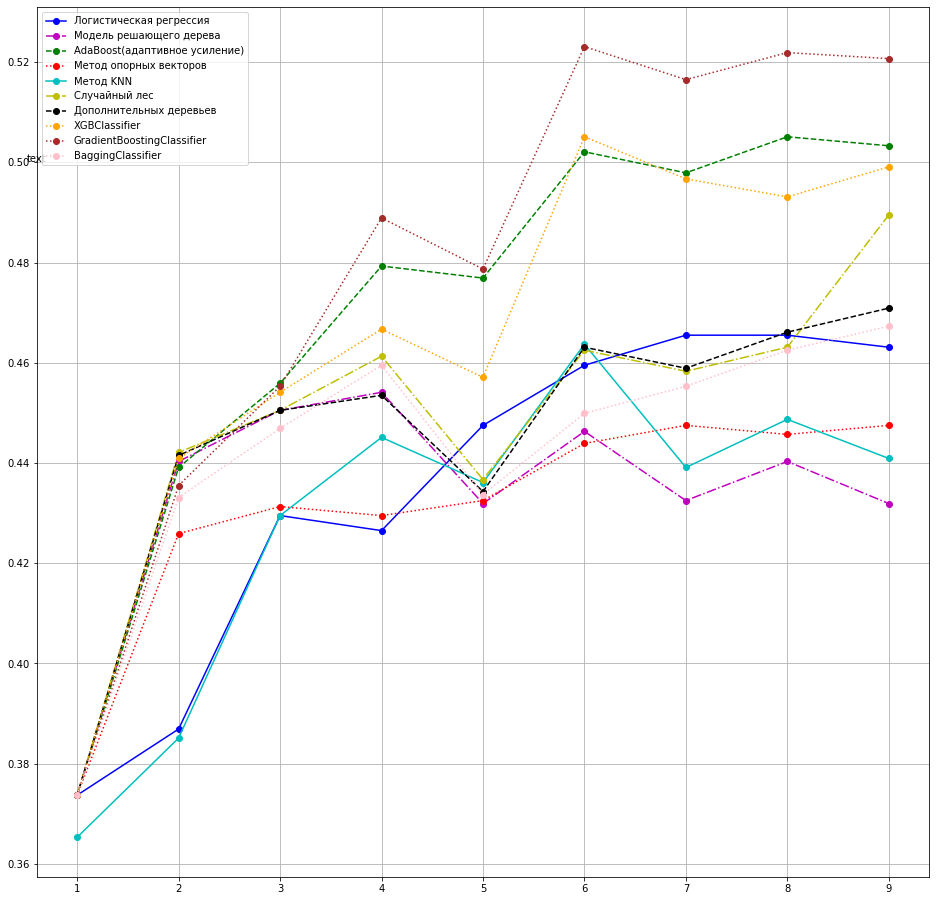

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
x = 1,2,3,4,5,6,7,8,9
plt.figure(figsize=(16, 16))

line1, = plt.plot(x, k[:9], 'o-b',label='Логистическая регрессия')
line2, = plt.plot(x, k[9:18], 'o-.m', label='Модель решающего дерева')
line3, = plt.plot(x, k[18:27], 'o--g', label='AdaBoost(адаптивное усиление)')

line4, = plt.plot(x, k[27:36], 'o:r', label='Метод опорных векторов')
line5, = plt.plot(x, k[36:45], 'o-c', label='Метод KNN')
line6, = plt.plot(x, k[45:54], 'o-.y', label='Случайный лес')
line7, = plt.plot(x, k[54:63], 'o--k', label='Дополнительных деревьев')
line8, = plt.plot(x, k[63:72], 'o:',color='orange', label='XGBClassifier')
line9, = plt.plot(x, k[72:81], 'o:',color='brown', label='GradientBoostingClassifier')
line10, = plt.plot(x, k[81:], 'o:',color='pink', label='BaggingClassifier')

plt.text(0.5, 0.5, 'text')
plt.grid()
plt.legend(fontsize=10)
plt.show()

In [44]:
k[9:18]

array([0.3737, 0.4403, 0.4499, 0.4541, 0.4319, 0.4493, 0.4313, 0.4361,
       0.4361])

In [63]:
lst_1 = list(range(1,10))
lst_3 = [LogisticRegression(C=0.01, max_iter=5000), 
         DecisionTreeClassifier(criterion='entropy', max_depth=5), 
         AdaBoostClassifier(learning_rate=0.11, n_estimators=60),
         SVC(C=100, gamma=0.001),
         KNeighborsClassifier(metric='manhattan', n_neighbors=50),
         RandomForestClassifier(max_depth=7, min_samples_leaf=3, n_estimators=60),
         ExtraTreesClassifier(max_depth=37, 
                             min_weight_fraction_leaf=0.001,
                             n_estimators=52),
         XGBClassifier(learning_rate=0.2, max_depth=5, max_features='log2',
                           min_samples_leaf=0.1, min_samples_split=0.1,
                           n_estimators=10),
         GradientBoostingClassifier(n_estimators=100, random_state=7),
         BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                        max_depth=5),
                  bootstrap=False, bootstrap_features=True, max_samples=0.8,
                  n_estimators=100)]
k = []

In [64]:
for i in lst_3:
   model = i
   for j in lst_1:
        test=SelectKBest(score_func=f_classif, k=j)
        fit=test.fit(X,Y)
        features=fit.transform(X)
        X_train, X_test, Y_train, Y_test = train_test_split(features, Y, test_size=0.25, 
                                                            shuffle=True, random_state=7)
        model.fit(X_train,Y_train)
        result=model.score(X_test,Y_test)
        k.append(result)
        print(result)
        print(f'Модель: {i} Количество  признаков = {j}')
        
    
    
    


0.40109072880515617
Модель: LogisticRegression(C=0.01, max_iter=5000) Количество  признаков = 1
0.4258800198314328
Модель: LogisticRegression(C=0.01, max_iter=5000) Количество  признаков = 2
0.44719881011403073
Модель: LogisticRegression(C=0.01, max_iter=5000) Количество  признаков = 3
0.4516608824987605
Модель: LogisticRegression(C=0.01, max_iter=5000) Количество  признаков = 4
0.47000495785820523
Модель: LogisticRegression(C=0.01, max_iter=5000) Количество  признаков = 5
0.47992067426871593
Модель: LogisticRegression(C=0.01, max_iter=5000) Количество  признаков = 6
0.47892910262766486
Модель: LogisticRegression(C=0.01, max_iter=5000) Количество  признаков = 7
0.47992067426871593
Модель: LogisticRegression(C=0.01, max_iter=5000) Количество  признаков = 8
0.47645017352503716
Модель: LogisticRegression(C=0.01, max_iter=5000) Количество  признаков = 9
0.40109072880515617
Модель: DecisionTreeClassifier(criterion='entropy', max_depth=5) Количество  признаков = 1
0.4526524541398116
Модель: 

D:\Programs\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Programs\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Programs\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is depre

[17:37:07] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:576: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:37:07] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.49429846306395636
Модель: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraint

D:\Programs\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Programs\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Programs\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is depre

Модель: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.2, max_delta_step=0,
              max_depth=5, max_features='log2', min_child_weight=1,
              min_samples_leaf=0.1, min_samples_split=0.1, missing=nan,
              monotone_constraints='()', n_estimators=10, n_jobs=12,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', ...) Количество  признаков = 6
[17:37:07] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:576: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings 

D:\Programs\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Programs\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.5384234010907288
Модель: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.2, max_delta_step=0,
              max_depth=5, max_features='log2', min_child_weight=1,
              min_samples_leaf=0.1, min_samples_split=0.1, missing=nan,
              monotone_constraints='()', n_estimators=10, n_jobs=12,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', ...) Количество  признаков = 9
0.40109072880515617
Модель: GradientBoostingClassifier(random_state=7) Количество  признаков = 1
0.45066931085770945
Модель: GradientBoostingClassifier(random_state=7) Количество  признаков = 2
0.4705007436787308
Модель: GradientBoostingCla

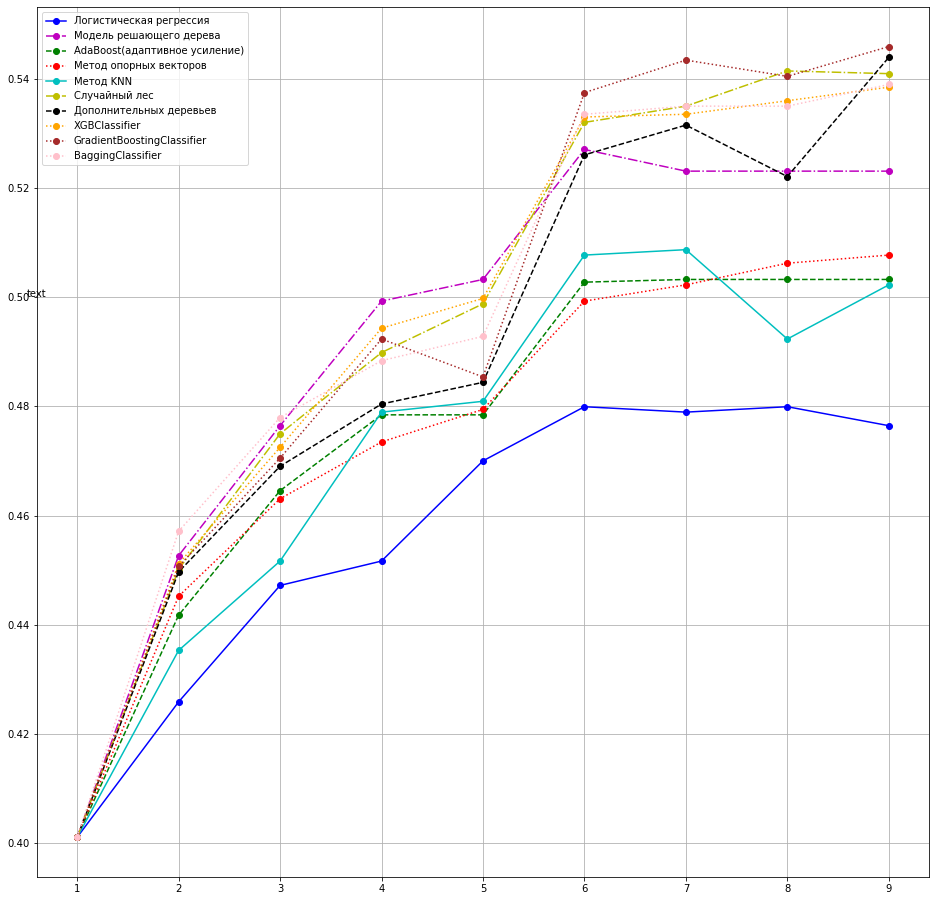

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
x = 1,2,3,4,5,6,7,8,9
plt.figure(figsize=(16, 16))

plt.title('Зависимость качества моделей от числа признаков', alpha=0.5, color='g', fontsize=20, fontstyle='italic',
fontweight='extra bold', linespacing=10)

line1, = plt.plot(x, k[:9], 'o-b',label='Логистическая регрессия')
line2, = plt.plot(x, k[9:18], 'o-.m', label='Модель решающего дерева')
line3, = plt.plot(x, k[18:27], 'o--g', label='AdaBoost(адаптивное усиление)')
line4, = plt.plot(x, k[27:36], 'o:r', label='Метод опорных векторов')
line5, = plt.plot(x, k[36:45], 'o-c', label='Метод KNN')
line6, = plt.plot(x, k[45:54], 'o-.y', label='Случайный лес')
line7, = plt.plot(x, k[54:63], 'o--k', label='Дополнительных деревьев')
line8, = plt.plot(x, k[63:72], 'o:',color='orange', label='XGBClassifier')
line9, = plt.plot(x, k[72:81], 'o:',color='brown', label='GradientBoostingClassifier')
line10, = plt.plot(x, k[81:], 'o:',color='pink', label='BaggingClassifier')

plt.text(0.5, 0.5, 'text')
plt.grid()
plt.legend(fontsize=10)
plt.show()

**Вывод: отбор показал, что лучший результат дает выбор 7 лучших признаков**

In [54]:
test=SelectKBest(score_func=f_classif, k=7)
fit=test.fit(X,Y)
features=fit.transform(X)
fit.scores_

array([  4.70368846, 496.43200214, 418.45793796, 354.51376472,
        53.09011086,  20.75182914, 364.22358787,  92.0107774 ,
        33.2485345 ])

In [55]:
features[0:2]

array([[ 0., 22.,  0.,  2.,  3.,  4.,  4.],
       [ 1., 67.,  1.,  4.,  3.,  1.,  6.]])

Вывод:
лучшими 7-ю признаками будут: **'Семейное_положение', 'Возраст', 'Высшее_образование', 'Профессия', 'Уровень_расходов', 'Размер_семьи', 'Анонимная_категория'**

# **4. LogisticRegression + рекурсивное_исключение**

In [10]:
from sklearn.feature_selection import RFE

In [11]:
lst_1 = list(range(1,10))
lst_2 = list(range(2,9))
k = []

In [12]:
model=LogisticRegression(solver='newton-cg',class_weight= 'balanced')    # максимальное значение: n_splits: 3 KBest: 9 0.4798188283483909
for i in lst_2:
   kfold=KFold(n_splits=i,random_state=7,shuffle=True)
   for j in lst_1:
      rfe=RFE(model,n_features_to_select=j)  
      fit=rfe.fit(X,Y)  
      features=fit.transform(X)
      results=cross_val_score(model, features, Y, cv=kfold)
      res = results.mean()
      k.append(res)
      print(f'n_splits: {i} KBest: {j} {res}')
   print(f'i {i} max: {max(k)}')

n_splits: 2 KBest: 1 0.4006002491005403
n_splits: 2 KBest: 2 0.43991057268992206
n_splits: 2 KBest: 3 0.44951130767338443
n_splits: 2 KBest: 4 0.4520622380365288
n_splits: 2 KBest: 5 0.463765344121447
n_splits: 2 KBest: 6 0.46571634954611907
n_splits: 2 KBest: 7 0.46481630455962764
n_splits: 2 KBest: 8 0.46916655951309416
n_splits: 2 KBest: 9 0.4778687802753865
i 2 max: 0.4778687802753865
n_splits: 3 KBest: 1 0.40060151895423673
n_splits: 3 KBest: 2 0.43631035773545834
n_splits: 3 KBest: 3 0.4504127810349698
n_splits: 3 KBest: 4 0.4556639815264732
n_splits: 3 KBest: 5 0.4660172455786777
n_splits: 3 KBest: 6 0.46466596231887936
n_splits: 3 KBest: 7 0.46961733543908196
n_splits: 3 KBest: 8 0.4694669151741829
n_splits: 3 KBest: 9 0.4798188283483909
i 3 max: 0.4798188283483909
n_splits: 4 KBest: 1 0.4006041828849116
n_splits: 4 KBest: 2 0.43646195730841825
n_splits: 4 KBest: 3 0.4501136387368385
n_splits: 4 KBest: 4 0.45776327927691773
n_splits: 4 KBest: 5 0.4643673606215131
n_splits: 4 KB

KeyboardInterrupt: 

**Вывод: отбор показал, что лучший результат дает выбор 9 лучших признаков**

In [69]:
model=LogisticRegression(solver='newton-cg',class_weight= 'balanced')
rfe=RFE(model,n_features_to_select=7)
fit=rfe.fit(X,Y)
fit.n_features_

7

In [70]:
fit.support_

array([ True,  True, False,  True,  True, False,  True,  True,  True])

In [71]:
fit.ranking_

array([1, 1, 3, 1, 1, 2, 1, 1, 1])

**Вывод:рекурсивное исключение показало, что лучший результат достигается когла учитываются все 9 признаков, 7 признаков на втором месте**

# **5. LogisticRegression + отбор_главных_компонент**

In [34]:
from sklearn.decomposition import PCA

In [77]:
lst_1 = list(range(1,10))
lst_2 = list(range(2,9))
k = []

In [78]:
model=LogisticRegression(solver='newton-cg',class_weight= 'balanced')    # максимальное значение: n_splits: 3 KBest: 9 0.4798188283483909
for i in lst_2:
   kfold=KFold(n_splits=i,random_state=7,shuffle=True)
   for j in lst_1:
      pca=PCA(n_components=j)  
      fit=pca.fit(X)  
      features=pca.fit_transform(X)
      results=cross_val_score(model, features, Y, cv=kfold)
      res = results.mean()
      k.append(res)
      print(f'n_splits: {i} KBest: {j} {res}')
   print(f'i {i} max: {max(k)}')

n_splits: 2 KBest: 1 0.40645159954170684
n_splits: 2 KBest: 2 0.4009004591935784
n_splits: 2 KBest: 3 0.42565667130938784
n_splits: 2 KBest: 4 0.43690856180455984
n_splits: 2 KBest: 5 0.4442601973282562
n_splits: 2 KBest: 6 0.4721678950608146
n_splits: 2 KBest: 7 0.4730689755650235
n_splits: 2 KBest: 8 0.47561815005029917
n_splits: 2 KBest: 9 0.4778687802753865
i 2 max: 0.4778687802753865
n_splits: 3 KBest: 1 0.4058504904970461
n_splits: 3 KBest: 2 0.3971499581295365
n_splits: 3 KBest: 3 0.4294077088933567
n_splits: 3 KBest: 4 0.4334575060387624
n_splits: 3 KBest: 5 0.4453103122108699
n_splits: 3 KBest: 6 0.47096807834768173
n_splits: 3 KBest: 7 0.4712687837896801
n_splits: 3 KBest: 8 0.4789182655320912
n_splits: 3 KBest: 9 0.4798188283483909
i 3 max: 0.4798188283483909
n_splits: 4 KBest: 1 0.40540313305886244
n_splits: 4 KBest: 2 0.3998535226928204
n_splits: 4 KBest: 3 0.42805922608995606
n_splits: 4 KBest: 4 0.43435976670212173
n_splits: 4 KBest: 5 0.44351252798659957
n_splits: 4 KBe

**Вывод: отбор показал, что лучший результат дает выбор 9 лучших признаков**

In [ ]:
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [2]:
import pandas as pd
import numpy as np
from pandas import read_csv

In [76]:
df=read_csv('D:\Политех\Класиффикация\Сегментация_клиентов\Train_cleared_dropna.csv')

In [77]:
df=df.filter(regex='^(?!.*Unnamed).*$')

In [15]:
df_T=read_csv('D:\Политех\Класиффикация\Сегментация_клиентов\TEST_cleared_dropna.csv')

In [17]:
df_T=df_T.filter(regex='^(?!.*Unnamed).*$')

In [6]:
df.head(5)

,Пол,Семейное_положение,Возраст,Высшее_образование,Профессия,Опыт_работы,Уровень_расходов,Размер_семьи,Анонимная_категория,Целевая_категория
0,1,0.0,22,0.0,2.0,1.0,3,4.0,4.0,4
1,0,1.0,67,1.0,4.0,1.0,3,1.0,6.0,2
2,1,1.0,67,1.0,6.0,0.0,1,2.0,6.0,2
3,1,1.0,56,0.0,1.0,0.0,2,2.0,6.0,3
4,1,0.0,32,1.0,2.0,1.0,3,3.0,6.0,3


In [7]:
df_T.head(5)

,Пол,Семейное_положение,Возраст,Высшее_образование,Профессия,Опыт_работы,Уровень_расходов,Размер_семьи,Анонимная_категория,Целевая_категория
0,0,1.0,36,1.0,4.0,0.0,3,1.0,6.0,2
1,1,1.0,37,1.0,2.0,8.0,2,4.0,6.0,1
2,1,1.0,59,0.0,7.0,11.0,1,2.0,6.0,2
3,1,1.0,47,1.0,5.0,0.0,1,5.0,4.0,3
4,1,1.0,61,1.0,5.0,5.0,3,3.0,6.0,4


**Обучающий_набор**

In [78]:
array = df.values
array
X = array[:,0:9]
Y = array[:,9]

In [9]:
X

array([[ 1.,  0., 22., ...,  3.,  4.,  4.],
       [ 0.,  1., 67., ...,  3.,  1.,  6.],
       [ 1.,  1., 67., ...,  1.,  2.,  6.],
       ...,
       [ 0.,  0., 33., ...,  3.,  1.,  6.],
       [ 0.,  0., 27., ...,  3.,  4.,  6.],
       [ 1.,  1., 37., ...,  2.,  3.,  4.]])

In [ ]:
Y

==============================================================

**Тестовый_набор**

In [19]:
array_T = df.values
array_T
XX = array_T[:,0:9]
YY = array_T[:,9]

In [ ]:
XX

In [ ]:
YY

In [21]:
d = df.drop_duplicates(keep = False)

In [24]:
d.to_csv('Train_cleared_dropna_drop_duplicates.csv')

**Обучающий_набор**

In [18]:
array = df.values
array
X = array[:,0:9]
Y = array[:,9]

In [23]:
d.Целевая_категория.value_counts()

1    1519
4    1505
2    1489
3    1454
Name: Целевая_категория, dtype: int64

=====================================================

In [1]:
df=read_csv('D:\Политех\Класиффикация\Сегментация_клиентов\Train_cleared_!!!!!!!!.csv')

NameError: name 'read_csv' is not defined

In [13]:
df=df.filter(regex='^(?!.*Unnamed).*$')

In [147]:
df_T=read_csv('D:\Политех\Класиффикация\Сегментация_клиентов\Test_cleared_!!!!!!!!.csv')

In [148]:
df_T=df_T.filter(regex='^(?!.*Unnamed).*$')

**Обучающий_набор**

In [149]:
array = df.values
array
X = array[:,0:9]
Y = array[:,9]

In [9]:
X

array([[ 1.,  0., 22., ...,  3.,  4.,  4.],
       [ 0.,  1., 67., ...,  3.,  1.,  6.],
       [ 1.,  1., 67., ...,  1.,  2.,  6.],
       ...,
       [ 0.,  0., 33., ...,  3.,  1.,  6.],
       [ 0.,  0., 27., ...,  3.,  4.,  6.],
       [ 1.,  1., 37., ...,  2.,  3.,  4.]])

In [ ]:
Y

==============================================================

**Тестовый_набор**

In [150]:
array_T = df_T.values
array_T
XX = array_T[:,0:9]
YY = array_T[:,9]

In [152]:
df_T.Целевая_категория.value_counts()

1    674
4    611
2    437
3    363
Name: Целевая_категория, dtype: int64

In [153]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# отбор признаков:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
# ансамблевые функции:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
import numpy as np
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
# сохраняет параметры после перезагрузки:
import pickle
import joblib

# **GrideSearchCV**

In [154]:
from sklearn.model_selection import GridSearchCV

In [142]:
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, shuffle=True, random_state=7) 

In [155]:
clf = LogisticRegression(max_iter = 5000)

In [156]:
parametrs = {'penalty':['l1','l2','elasticnet', 'none'], 
             'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

In [157]:
grid = GridSearchCV(clf, param_grid=parametrs, cv=3,verbose=1,n_jobs=-1)
grid.fit(X,Y)

Fitting 3 folds for each of 28 candidates, totalling 84 fits


D:\Programs\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan 0.43384135        nan 0.44423967        nan 0.45010872
        nan 0.44423967        nan 0.44423959        nan 0.44423967
        nan 0.44474277        nan 0.44423967        nan 0.44423975
        nan 0.44423967        nan 0.44440734        nan 0.44423967
        nan 0.44390416        nan 0.44423967]
  warnings.warn(


GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=5000), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none']},
             verbose=1)

In [158]:
print(grid.best_params_)
print(grid.best_estimator_)

{'C': 0.01, 'penalty': 'l2'}
LogisticRegression(C=0.01, max_iter=5000)


In [159]:
from sklearn.metrics import classification_report, confusion_matrix

In [160]:
grid_predictions = grid.predict(XX)
print(classification_report(YY, grid_predictions))

              precision    recall  f1-score   support

         1.0       0.32      0.24      0.27       674
         2.0       0.27      0.20      0.23       437
         3.0       0.25      0.39      0.30       363
         4.0       0.42      0.46      0.43       611

    accuracy                           0.32      2085
   macro avg       0.31      0.32      0.31      2085
weighted avg       0.32      0.32      0.32      2085



In [161]:
print(confusion_matrix(YY, grid_predictions))

[[162 104 178 230]
 [130  89 118 100]
 [ 82  76 142  63]
 [139  59 134 279]]


In [ ]:
================================================================================================================

In [162]:
model = LogisticRegression(C=0.01, max_iter=5000)

In [163]:
model.fit(X,Y)

LogisticRegression(C=0.01, max_iter=5000)

In [164]:
new_predictions = model.predict(XX)

In [165]:
print(classification_report(YY, new_predictions))
print(confusion_matrix(YY, new_predictions))

              precision    recall  f1-score   support

         1.0       0.32      0.24      0.27       674
         2.0       0.27      0.20      0.23       437
         3.0       0.25      0.39      0.30       363
         4.0       0.42      0.46      0.43       611

    accuracy                           0.32      2085
   macro avg       0.31      0.32      0.31      2085
weighted avg       0.32      0.32      0.32      2085

[[162 104 178 230]
 [130  89 118 100]
 [ 82  76 142  63]
 [139  59 134 279]]


In [ ]:
================================================================================================================

# **Проверка наличия противоречивых даных:**

In [90]:
df=read_csv('D:\Политех\Класиффикация\Сегментация_клиентов\Train_cleared_dropna_drop_duplicates.csv')

In [91]:
df=df.filter(regex='^(?!.*Unnamed).*$')

In [16]:
array = df.values
array
X = array[:,0:9]
Y = array[:,9]

In [9]:
X

array([[ 1.,  0., 22., ...,  3.,  4.,  4.],
       [ 0.,  1., 67., ...,  3.,  1.,  6.],
       [ 1.,  1., 67., ...,  1.,  2.,  6.],
       ...,
       [ 0.,  0., 33., ...,  3.,  1.,  6.],
       [ 0.,  0., 27., ...,  3.,  4.,  6.],
       [ 1.,  1., 37., ...,  2.,  3.,  4.]])

In [ ]:
Y

In [92]:
df.Целевая_категория.value_counts()

1    1519
4    1505
2    1489
3    1454
Name: Целевая_категория, dtype: int64

In [93]:
df.columns

Index(['Пол', 'Семейное_положение', 'Возраст', 'Высшее_образование',
       'Профессия', 'Опыт_работы', 'Уровень_расходов', 'Размер_семьи',
       'Анонимная_категория', 'Целевая_категория'],
      dtype='object')

In [95]:
d = df.drop_duplicates()

In [96]:
d.Целевая_категория.value_counts()

1    1519
4    1505
2    1489
3    1454
Name: Целевая_категория, dtype: int64

In [102]:
df.shape

(5963, 10)

In [112]:
df_ = df.drop(columns='Целевая_категория') 

In [114]:
df_.shape

(5963, 9)

In [115]:
df_ = df_.drop_duplicates()

In [116]:
df_.shape

(5727, 9)

In [117]:
df.shape[0] - df_.shape[0]

236

In [120]:
df_L=df.drop(columns='Целевая_категория')

In [122]:
df_R = df['Целевая_категория']

In [123]:
df_R

0       2
5       1
6       4
7       2
8       3
       ..
5962    3
5963    2
5964    4
5965    2
5966    2
Name: Целевая_категория, Length: 5963, dtype: int64

In [124]:
df_L.shape

(5963, 9)

In [125]:
df_L = df_L.drop_duplicates()

In [126]:
df_L.shape

(5727, 9)

In [127]:
df_clear = pd.merge(df_L, df_R, left_index=True, right_index=True)

In [129]:
df

,Пол,Семейное_положение,Возраст,Высшее_образование,Профессия,Опыт_работы,Уровень_расходов,Размер_семьи,Анонимная_категория,Целевая_категория
0,0,1.0,67,1.0,4.0,1.0,3,1.0,6.0,2
5,0,0.0,26,1.0,4.0,1.0,3,3.0,6.0,1
6,1,0.0,19,0.0,2.0,4.0,3,4.0,4.0,4
7,0,1.0,58,0.0,5.0,0.0,3,1.0,3.0,2
8,0,0.0,41,0.0,2.0,1.0,3,2.0,1.0,3
...,...,...,...,...,...,...,...,...,...,...
5962,1,1.0,65,0.0,1.0,0.0,2,2.0,6.0,3
5963,1,1.0,41,1.0,1.0,0.0,1,5.0,6.0,2
5964,1,0.0,35,0.0,7.0,3.0,3,4.0,4.0,4
5965,0,0.0,27,1.0,2.0,1.0,3,4.0,6.0,2


In [132]:
df_clear.shape

(5727, 10)

In [130]:
df_clear.isna().sum()

Пол                    0
Семейное_положение     0
Возраст                0
Высшее_образование     0
Профессия              0
Опыт_работы            0
Уровень_расходов       0
Размер_семьи           0
Анонимная_категория    0
Целевая_категория      0
dtype: int64

In [135]:
array = df_clear.values
array
X = array[:,0:9]
Y = array[:,9]

In [136]:
from sklearn.model_selection import GridSearchCV

In [142]:
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, shuffle=True, random_state=7) 

In [137]:
clf = LogisticRegression(max_iter = 5000)

In [138]:
parametrs = {'penalty':['l1','l2','elasticnet', 'none'], 
             'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

In [139]:
grid = GridSearchCV(clf, param_grid=parametrs, cv=3,verbose=1,n_jobs=-1)
grid.fit(X,Y)

Fitting 3 folds for each of 28 candidates, totalling 84 fits


D:\Programs\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan 0.43338572        nan 0.4468308         nan 0.45224376
        nan 0.4468308         nan 0.44857692        nan 0.4468308
        nan 0.44735464        nan 0.4468308         nan 0.44718002
        nan 0.4468308         nan 0.4468308         nan 0.4468308
        nan 0.44805308        nan 0.4468308 ]
  warnings.warn(


GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=5000), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none']},
             verbose=1)

In [140]:
print(grid.best_params_)
print(grid.best_estimator_)

{'C': 0.01, 'penalty': 'l2'}
LogisticRegression(C=0.01, max_iter=5000)


In [83]:
from sklearn.metrics import classification_report, confusion_matrix

In [141]:
grid_predictions = grid.predict(XX)
print(classification_report(YY, grid_predictions))

              precision    recall  f1-score   support

         1.0       0.32      0.25      0.28       692
         2.0       0.26      0.19      0.22       450
         3.0       0.26      0.40      0.31       381
         4.0       0.42      0.47      0.44       631

    accuracy                           0.33      2154
   macro avg       0.32      0.33      0.32      2154
weighted avg       0.33      0.33      0.32      2154



In [64]:
print(confusion_matrix(YY, grid_predictions))

[[164 110 182 236]
 [133  91 121 105]
 [ 85  82 149  65]
 [140  60 141 290]]


In [ ]:
================================================================================================================

In [142]:
model = LogisticRegression(C=0.01, max_iter=5000)

In [143]:
model.fit(X,Y)

LogisticRegression(C=0.01, max_iter=5000)

In [144]:
new_predictions = model.predict(XX)

In [145]:
print(classification_report(YY, new_predictions))
print(confusion_matrix(YY, new_predictions))

              precision    recall  f1-score   support

         1.0       0.32      0.25      0.28       692
         2.0       0.26      0.19      0.22       450
         3.0       0.26      0.40      0.31       381
         4.0       0.42      0.47      0.44       631

    accuracy                           0.33      2154
   macro avg       0.32      0.33      0.32      2154
weighted avg       0.33      0.33      0.32      2154

[[175 104 177 236]
 [137  86 120 107]
 [ 90  74 152  65]
 [139  62 136 294]]


In [ ]:
================================================================================================================

In [146]:
df_clear.to_csv('Train_cleared_!!!!!!!!.csv')